## Week 5. Decision Tree

5주차는 두가지 목표를 갖고 있다.
1. Scikit-learn library를 사용하여 Decision Tree classification을 할수 있다.

2. Ploty와 Graphviz를 사용하여 데이터와 결과에 대한 시각화를 할 수 있다.


### 1. Load data

13가지의 feature를 사용하여 3개의 클래스를 성공적으로 분류해 내는것이 목표이다.  

데이터는 scikit-learn을 통해 받는다.

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

data_class=datasets.load_wine()

data = pd.DataFrame(data_class.data, columns=data_class.feature_names)
target = pd.DataFrame(data_class.target, columns=['target'])

data는 13차원(공간적 특징임)으로 구성되어 있다.  

target또한 받을 수 있으며 자세한 내용은 지난 과제로부터 사용하였다.  

target과 data를 확인해보겟다.  

In [2]:
data.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

숫자형이기 때문에 원핫인코딩으로 우열을 가릴 필요가 없게 되었다.

In [3]:
target.head()

target
0       0
1       0
2       0
3       0
4       0

In [4]:
data.shape, target.shape

((178, 13), (178, 1))

178개의 샘플이 있다.

### 2. Decision Tree - evaluation score

Decision tree는 이진분류을 tree구조로 시행하여 분류하는 방법이다.  

Decision tree의 핵심은 이진 분류의 기준에 있으며 기준에 따라 다양한 Tree를 생성하게 된다.  

기준은 information gain을 줄이는 방향으로 이뤄진다.  

이말은 node에서 뻗어나간 leaf node가 node보다 다양성을 덜 내포한다는 말과 같다.  

간단하게 leaf로 갈수록 이진분류된 data의 class는 하나만 남게 된다는 것이다.  

따라서 information gain은 분류 시행후 각 leaf의 class들이 얼마나 다양하게 존재하는지 계산한 값을 의미한다.  

분류문제를 해결하기 위해 information gain은 대표적으로 Gini index와 Entropy를 사용한다.  

In [5]:
def gini(mat):
    probs=1
    for n in range(2):
        probs -= (mat==n).mean()**2 
    return probs

def entropy(mat):
    probs = 0
    for n in range(2):
        probs +=(mat==n).mean()*np.log2((mat==n).mean()+1e-15)
    return -probs

mat=np.zeros((101, 100))

for n in range(101):
    mat[n,:n]=1

score=[]
for m in mat:
    score.append([gini(m),entropy(m)])

score=np.array(score)

In [6]:
from plotly import graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=[i/101 for i in range(101)],
                        y=score[:,0],name ='Gini'))
fig.add_trace(go.Scatter(x=[i/101 for i in range(101)],
                        y=score[:,1],name ='Entropy'))
fig_options = {'layout':dict(template='simple_white',
                            width=800,height=500,
                            xaxis_title='Percentage of data accounted for Class 1',
                            yaxis_title='Each information gain')}

fig.update(fig_options)
fig.show()

Information gain을 구하는 두 방법 모두 class가 1:1로 섞일 때 Gini는 0.5, Entropy는 1이 된다.   

만약 적절한 decision condition을 사용할 경우 information gain을 줄일 수 있다.


### 3. Decision Tree - classification

Decision tree에 위에서 설명한 두 평가 지표를 사용해 분류하고 결과를 비교해보겠다.  

DecisionTreeClassifier의 매개변수 crterion에 gini와 entropy를 입력하는 것으로 사용가능하다.  

각 방법은 데이터를 train set과 test set으로 나눈 후 예측을 수행한다.  

먼저 gini를 사용한 경우이다.  

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(data,target,test_size=0.3,shuffle=True)

In [8]:
gini_model = DecisionTreeClassifier(criterion='gini').fit(x_train, y_train)
gini_model.score(x_test, y_test)

0.9074074074074074

그리고 entropy를 사용한 경우 

In [9]:
entropy_model = DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)
entropy_model.score(x_test, y_test)

0.9074074074074074

Tree model은 score method를 사용하여 mean of accuracy를 계산해줍니다.  

두 방법의 정확도에 차이가 있는 것으로 보아 이진 분류 기준이 서로 다른것을 알 수 있다.  

따라서 각 분류 기준을 확인하기 위해 graphviz library를 사용한다.  

Graphviz는 이진 분류된 tree구조를 시각화 해주는 library이다.  

Graphviz에 전달할 data를 생성하기 위해 sklearn.tree의 export_graphviz를 불러온다. 

In [10]:
!pip install graphviz

In [32]:
import graphviz
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

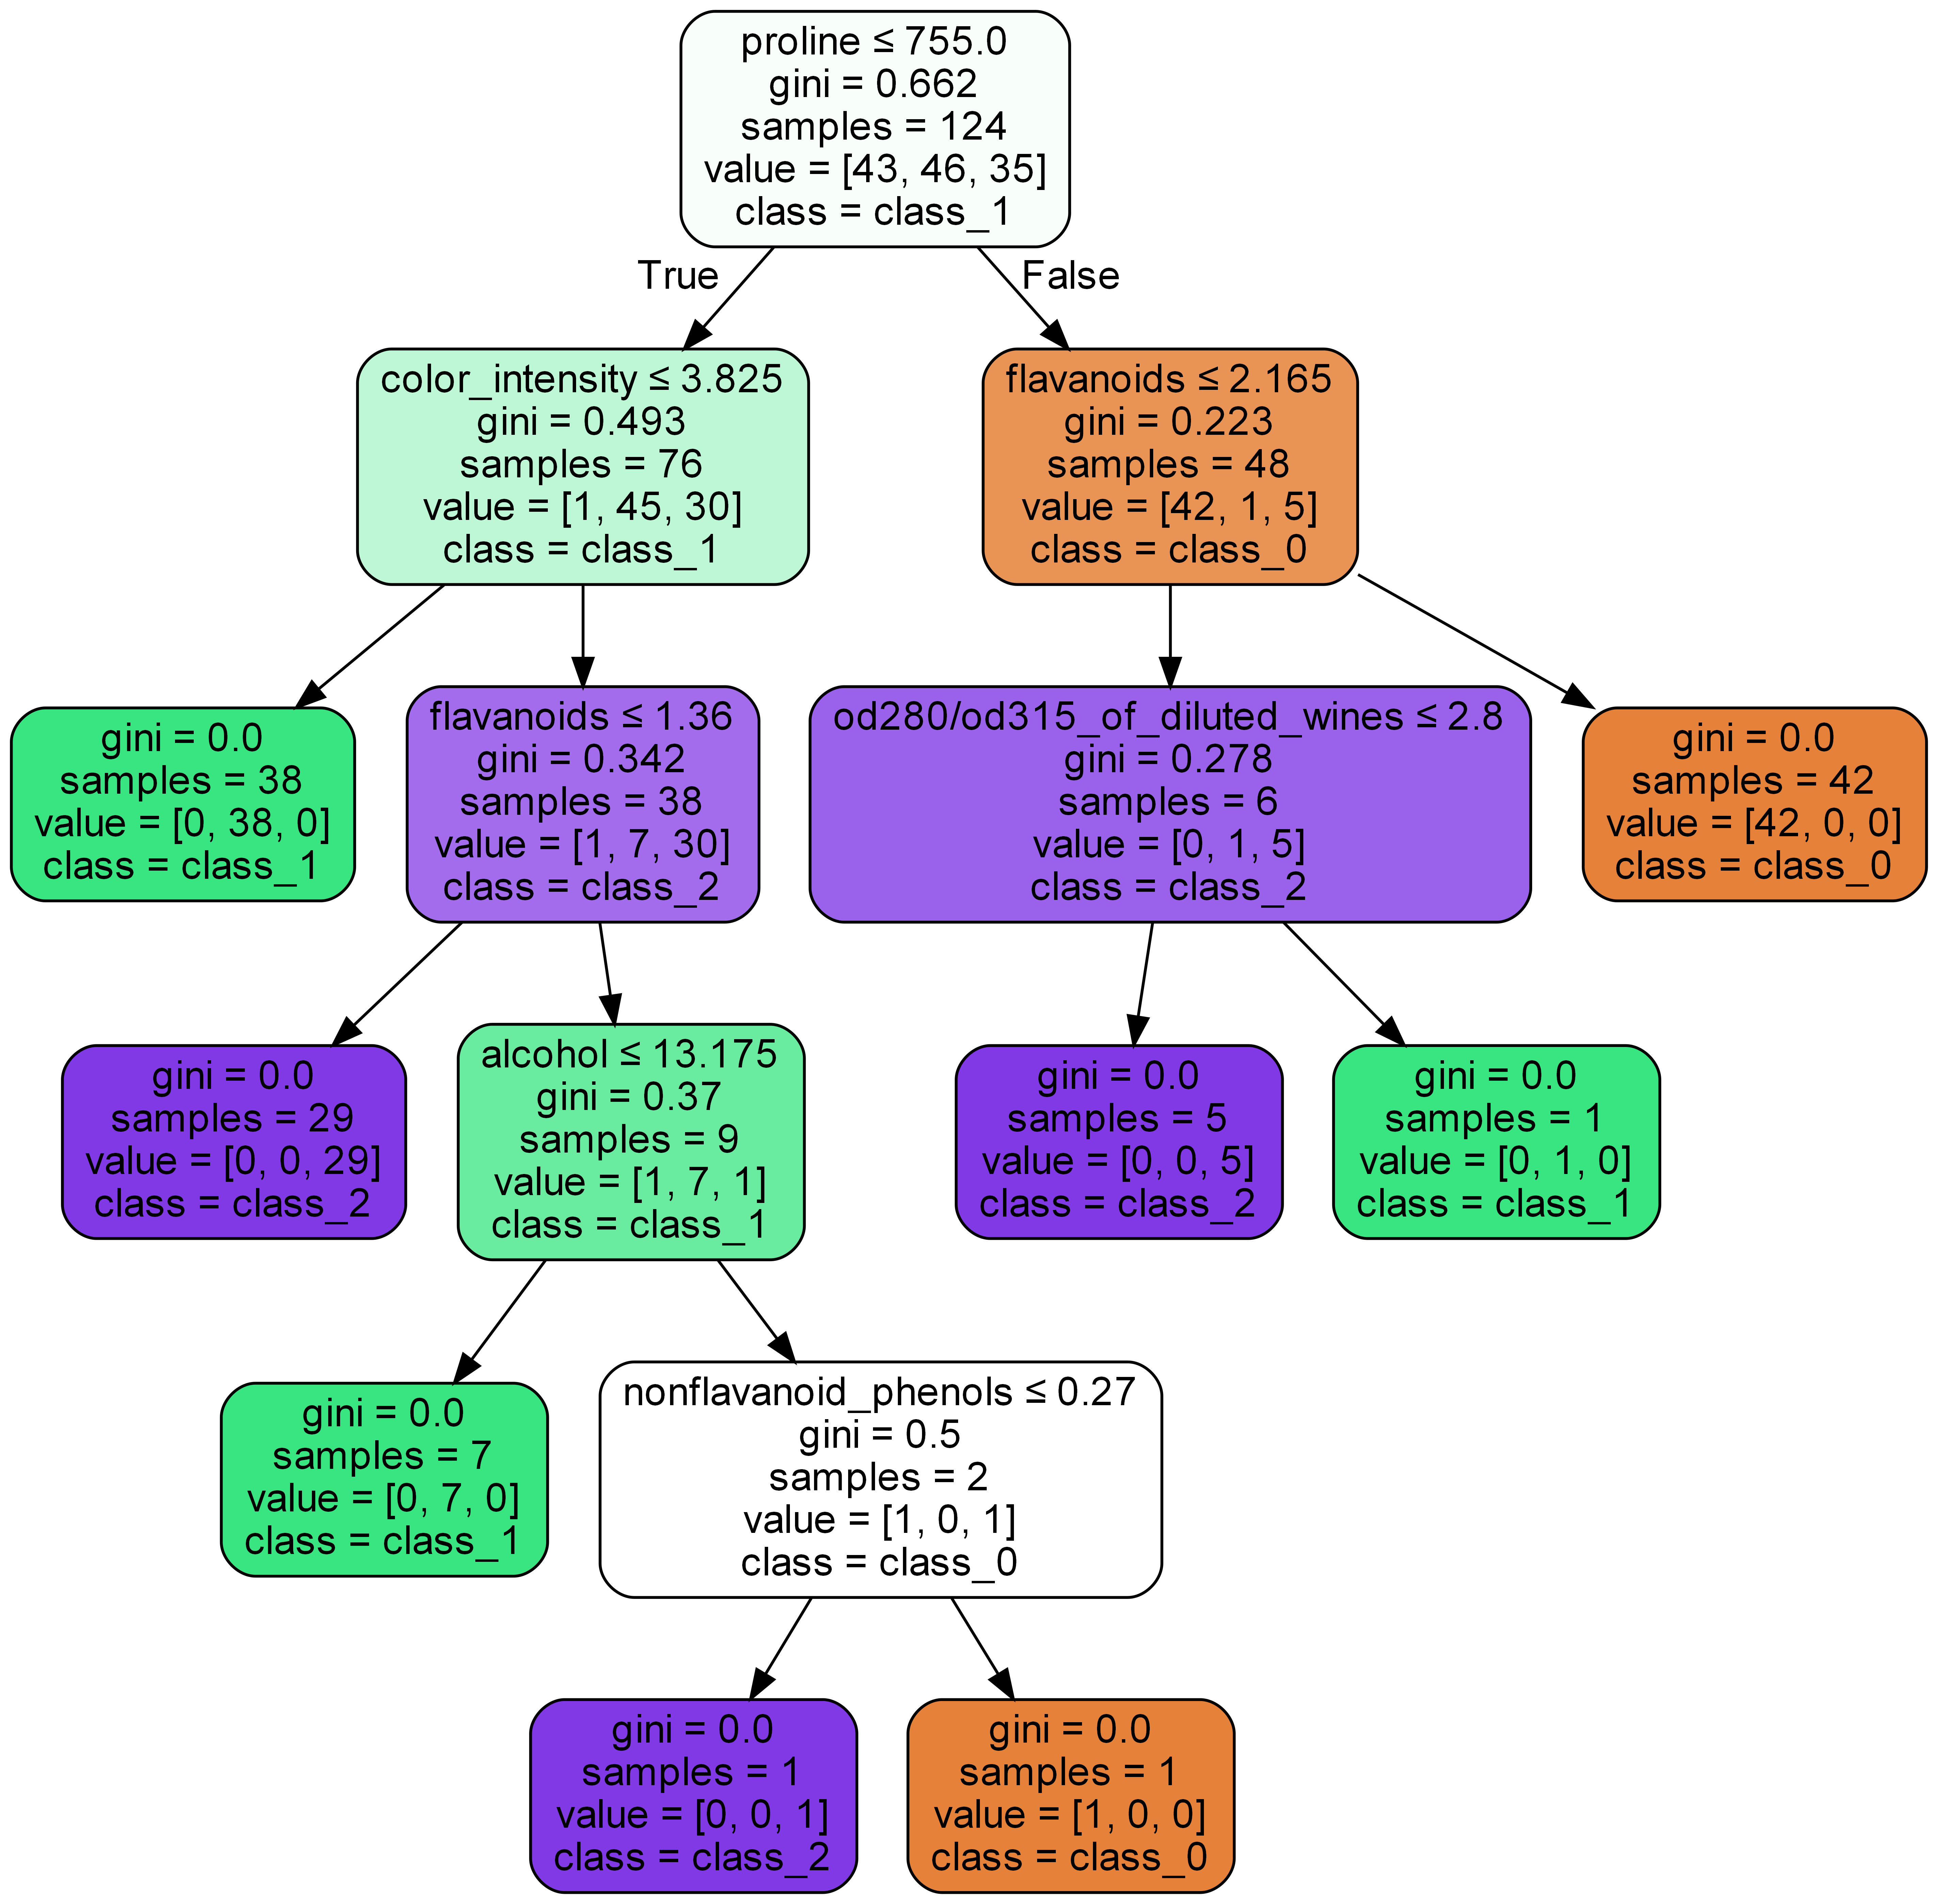

In [34]:
export_graphviz(gini_model, out_file='gini.dot',
               feature_names = data.columns,
               class_names = data_class.target_names, 
                filled=True, rounded=True, special_characters=True)
call(['dot', '-Tpng', 'gini.dot', '-o', 'gini.png', '-Gdpi=600'])
Image(filename = 'gini.png')

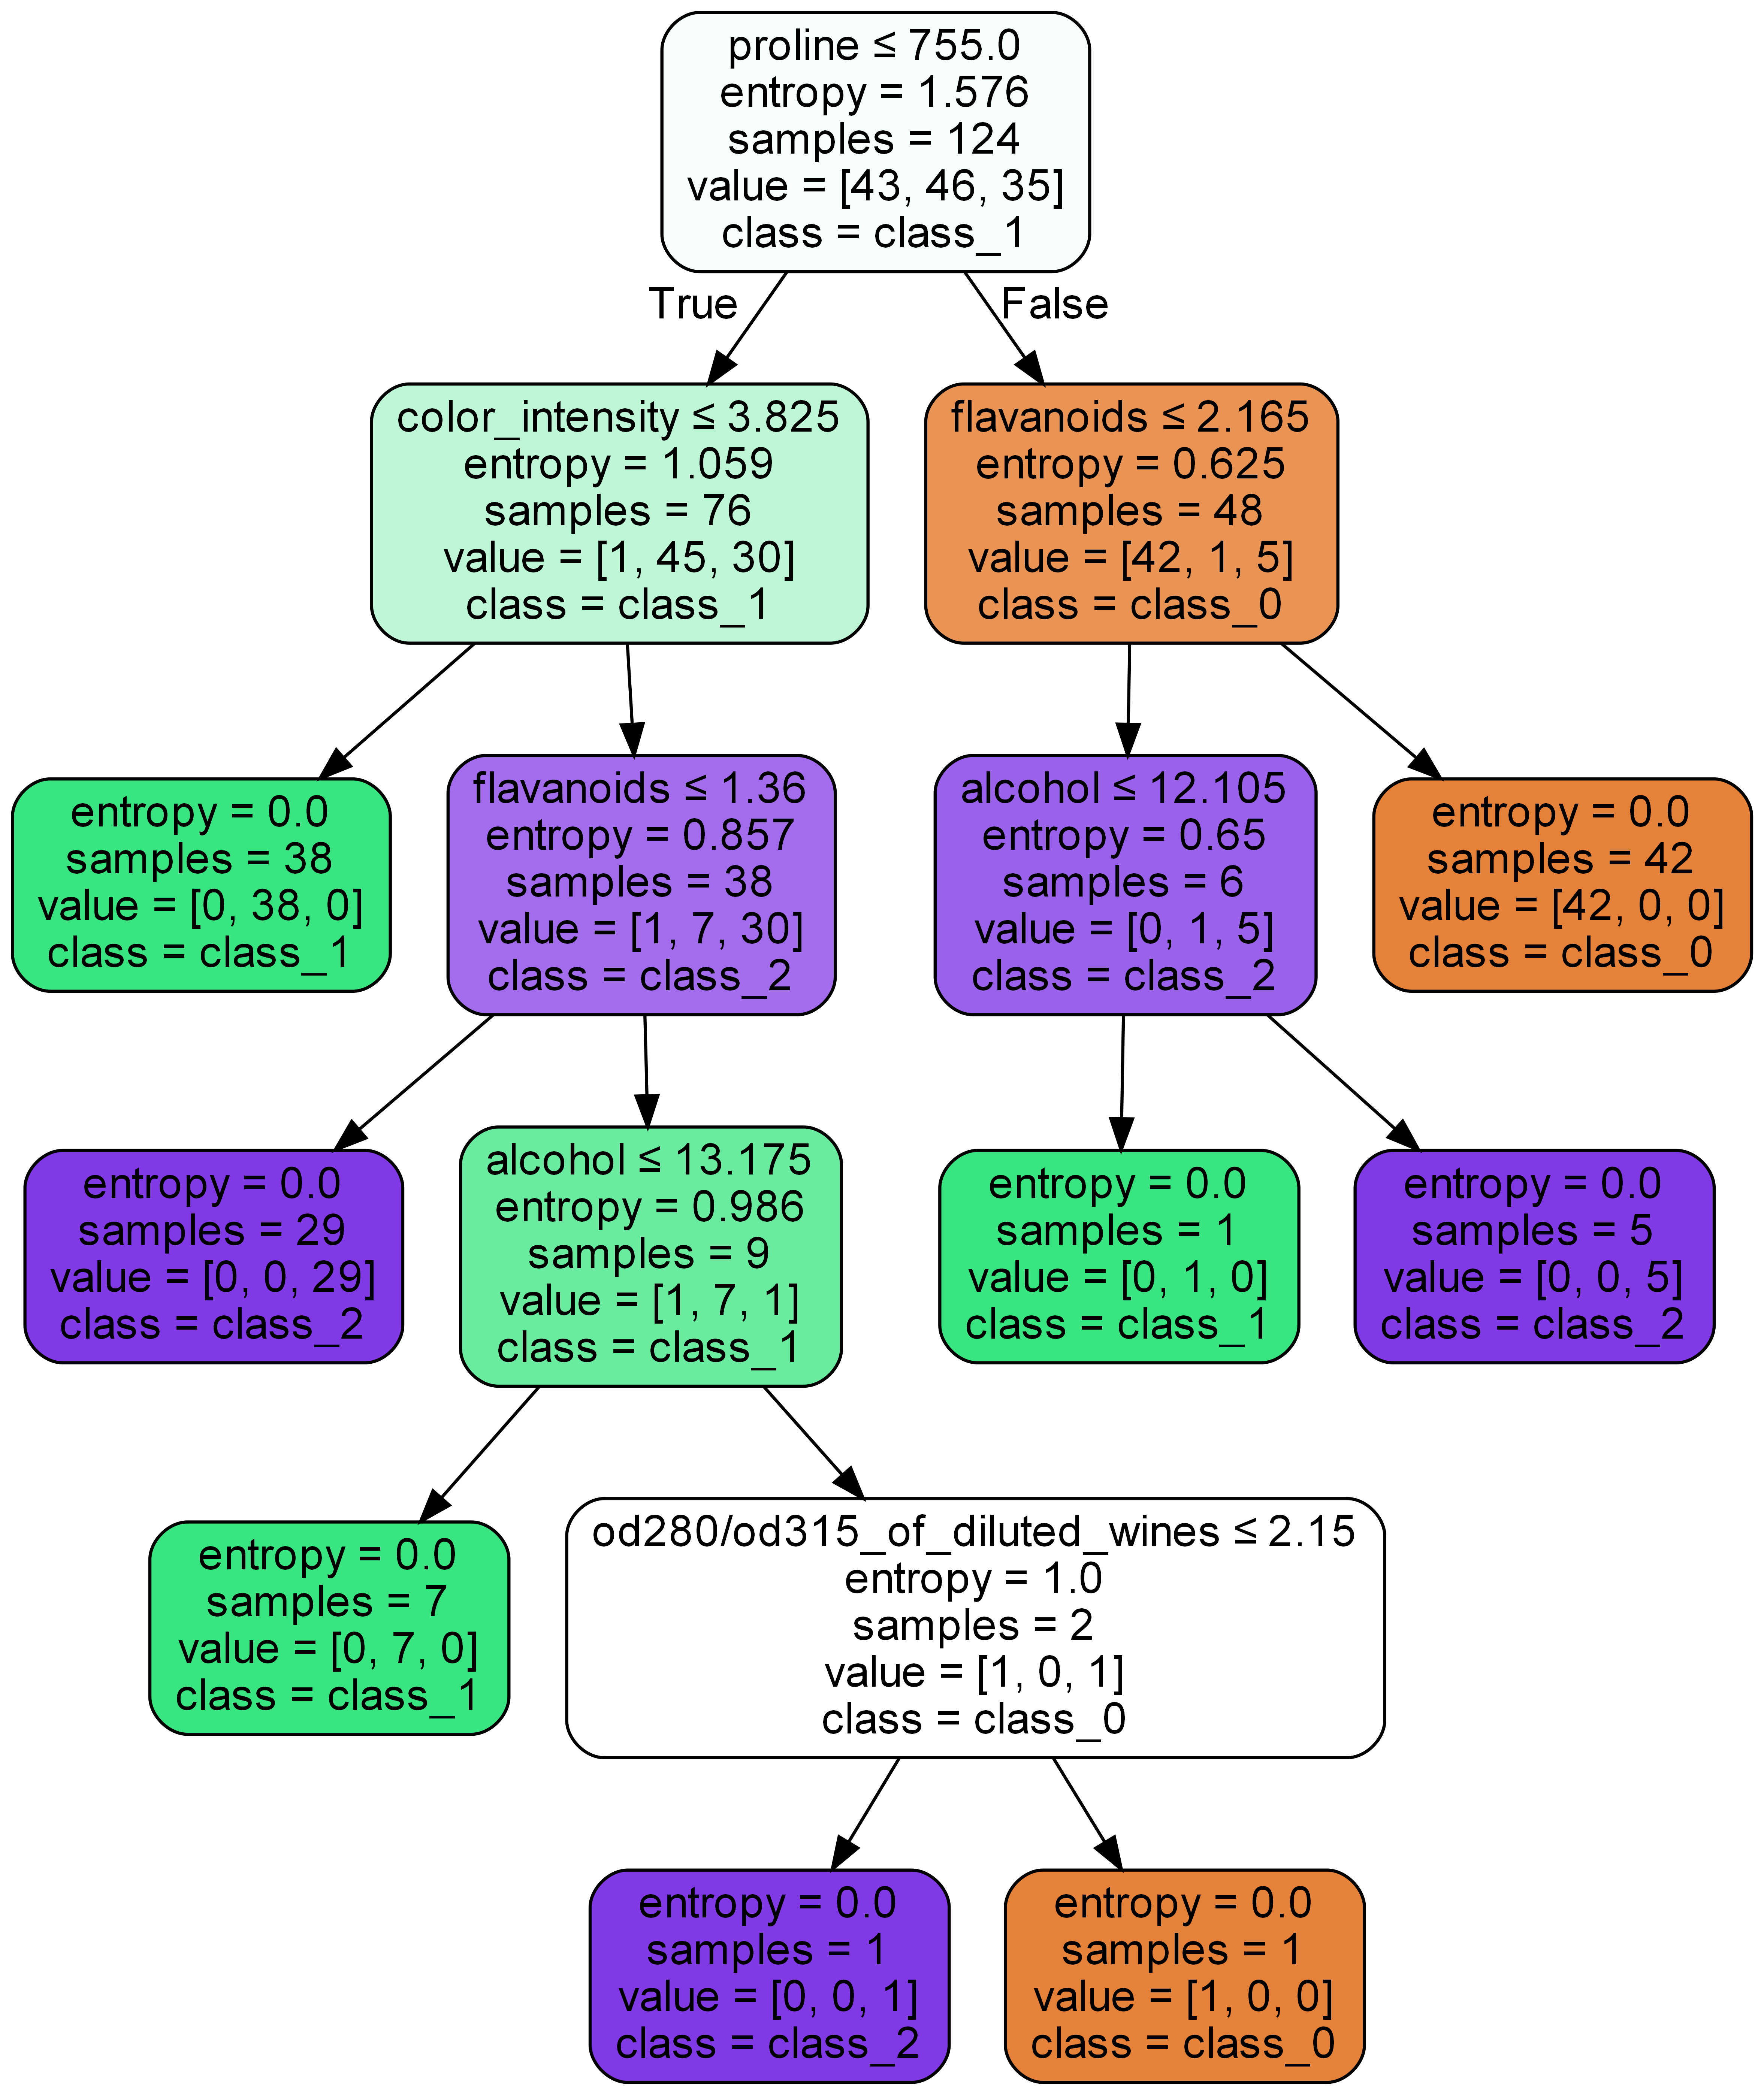

In [35]:
export_graphviz(entropy_model, out_file='entro.dot',
               feature_names = data.columns,
               class_names = data_class.target_names, 
                filled=True, rounded=True, special_characters=True)
call(['dot', '-Tpng', 'entro.dot', '-o', 'entropy.png', '-Gdpi=600'])
Image(filename = 'entropy.png')

### 4. Decision Tree - pruning

앞서 생성한 tree들은 전부 impurity가 최소화 할때까지 leaf node를 뻗어나갔다.  

이것은 data를 설명하는 decision node가 복잡할수록 모델의 복잡도를 증가시키며 과적합 현상을 보인다.  

따라서 tree 기반의 기법들은 가지치기를 사용하여 과적합을 예방하고 복잡도를 조절한다.  

pre-pruning은 hyperparameter들을 조절하여 적용한다.  

반대로 post-pruning은 결과를 보고 pruning을 적용한다.  

### 4-01. pre-pruning

tree의 leaf node를 제어하기 때문에 이전 full tree를 생성할 때 보다 비용이 적게 소모된다.  

하지만 leaf가 사용자의 hyper parameter에 의해 결정된 만큼 greedy한 방법이다.  

### 4-02. post -pruning

일반적으로 full tree를 생성한뒤 살펴봐야 하기때문에 비용이 비싸다.  

그러나 prunung 전후의 결과를 비교하기 때문에 모델의 다양성을 검토할수 있다.  

In [36]:
tree = DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)

fig = go.Figure()

fig.add_trace(go.Scatter(x=tree.cost_complexity_pruning_path(x_train,y_train)['ccp_alphas'],
                         y=tree.cost_complexity_pruning_path(x_train,y_train)['impurities'],
                         name ='Train'))
fig.add_trace(go.Scatter(x=tree.cost_complexity_pruning_path(x_test,y_test)['ccp_alphas'],
                         y=tree.cost_complexity_pruning_path(x_test,y_test)['impurities'],
                         name ='Test'))
fig_options = {'layout':dict(template='simple_white',
                            width=800,height=500,
                            xaxis_title='A parameter for post pruning',
                            yaxis_title='The impurities - entropy')}

fig.update(fig_options)
fig.show()

CCP는 Minimal Cost-Complexity Pruning을 의미한다.  

Full tree를 생성한 후에 노드의 경로를 추적하여 pruning하였을 때의 비용을 구하는 방식이다.  

학습과정에서는 pruning에 따라 impurity가 급격하게 증가하는 모습을 확인할 수 있다.  

하지만 예측하는 과정에서는 크게 차이가 없기 때문에 적절한 pruning은 실제 예측 성능에 손실을 주지않고 cost를 감소시킴을 확인가능  

ccp alpha에 따른 model의 변화를 더 다양하게 확인하겟다.  